## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
df = pd.read_csv('marriage_proposal.csv')
df

,Height,Age,Income,RomanticGestureScore,CompatibilityScore,CommunicationScore,DistanceKM,Response,AgeCategory
0,156,59,7977,3,1,1,45,1,Senior
1,169,32,5842,0,1,5,46,1,Middle-aged
2,178,42,17638,2,5,5,13,0,Middle-aged
3,164,78,8793,0,0,7,52,0,Senior
4,160,35,15262,6,0,0,9,1,Middle-aged
...,...,...,...,...,...,...,...,...,...
9995,162,76,12311,4,1,5,75,1,Senior
9996,162,75,6459,7,9,0,52,1,Senior
9997,166,70,9231,9,4,6,33,0,Senior
9998,176,78,12656,8,9,5,25,1,Senior


In [3]:
missing = df.isnull().sum()
per_mis = 100*(missing/len(df))
data_type = df.dtypes
number_unique = df.nunique()
pd.DataFrame({"Missing" : missing,
                "data_type": data_type,
                "number_unique" : number_unique})

,Missing,data_type,number_unique
Height,0,int64,31
Age,0,int64,61
Income,0,int64,7307
RomanticGestureScore,0,int64,11
CompatibilityScore,0,int64,10
CommunicationScore,0,int64,10
DistanceKM,0,int64,99
Response,0,int64,2
AgeCategory,153,object,3


In [4]:
data_n = df.loc[df['Age'] == 20]
data_n

,Height,Age,Income,RomanticGestureScore,CompatibilityScore,CommunicationScore,DistanceKM,Response,AgeCategory
105,163,20,12240,5,2,0,56,0,NaN
234,172,20,10774,5,0,7,32,0,NaN
272,161,20,8290,8,9,0,35,0,NaN
298,155,20,9812,10,2,5,6,1,NaN
389,157,20,6843,9,5,6,41,0,NaN
...,...,...,...,...,...,...,...,...,...
9680,155,20,5175,4,5,7,20,1,NaN
9729,175,20,12399,10,1,9,46,0,NaN
9757,157,20,13973,1,9,1,77,1,NaN
9850,172,20,9700,7,8,8,79,0,NaN


In [5]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,Height,Age,Income,RomanticGestureScore,CompatibilityScore,CommunicationScore,DistanceKM,Response,AgeCategory
105,163,20,12240,5,2,0,56,0,NaN
234,172,20,10774,5,0,7,32,0,NaN
272,161,20,8290,8,9,0,35,0,NaN
298,155,20,9812,10,2,5,6,1,NaN
389,157,20,6843,9,5,6,41,0,NaN
...,...,...,...,...,...,...,...,...,...
9680,155,20,5175,4,5,7,20,1,NaN
9729,175,20,12399,10,1,9,46,0,NaN
9757,157,20,13973,1,9,1,77,1,NaN
9850,172,20,9700,7,8,8,79,0,NaN


## Mengatasi NaN

In [7]:
data = df.loc[df['AgeCategory'] == 'Young']

In [8]:
data_1 = df.loc[df['AgeCategory'] == 'Senior']

In [9]:
data_2 = df.loc[df['AgeCategory'] == 'Middle-aged']

In [10]:
dfs =[data,data_1,data_2]

In [11]:
merged_df = pd.concat([df.iloc[:, 1].rename(f'Age_{idx+1}') for idx, df in enumerate(dfs)], axis=1)

In [12]:
merged_df

,Age_1,Age_2,Age_3
7,23.0,NaN,NaN
21,28.0,NaN,NaN
23,24.0,NaN,NaN
30,24.0,NaN,NaN
41,30.0,NaN,NaN
...,...,...,...
9967,NaN,NaN,40.0
9976,NaN,NaN,37.0
9977,NaN,NaN,40.0
9986,NaN,NaN,43.0


In [13]:
data.describe()

,Height,Age,Income,RomanticGestureScore,CompatibilityScore,CommunicationScore,DistanceKM,Response
count,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000
mean,165.429283,25.421184,12483.027414,4.960125,4.538941,4.571963,50.624299,0.505296
std,8.941526,2.865575,4275.004739,3.154723,2.889574,2.889803,28.305076,0.500128
min,150.000000,21.000000,5004.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,157.000000,23.000000,8741.000000,2.000000,2.000000,2.000000,27.000000,0.000000
50%,166.000000,25.000000,12611.000000,5.000000,4.000000,5.000000,52.000000,1.000000
75%,173.000000,28.000000,16137.000000,8.000000,7.000000,7.000000,75.000000,1.000000
max,180.000000,30.000000,19990.000000,10.000000,9.000000,9.000000,99.000000,1.000000


In [14]:
merged_df.describe()

,Age_1,Age_2,Age_3
count,1605.000000,4843.000000,3399.000000
mean,25.421184,65.635350,40.320683
std,2.865575,8.631566,5.779153
min,21.000000,51.000000,31.000000
25%,23.000000,58.000000,35.000000
50%,25.000000,66.000000,40.000000
75%,28.000000,73.000000,45.000000
max,30.000000,80.000000,50.000000


In [15]:
for index, row in df.iterrows():
    if pd.isnull(row['AgeCategory']):
        if row['Age'] >= 20 <= 30:
            df.at[index, 'AgeCategory'] = 'Young'
        elif row['Age'] > 30 <= 50:
            df.at[index, 'AgeCategory'] = 'Middle-aged'
        elif row['Age'] > 50:
            df.at[index, 'AgeCategory'] = 'Senior'

In [16]:
missing = df.isnull().sum()
per_mis = 100*(missing/len(df))
data_type = df.dtypes
number_unique = df.nunique()
pd.DataFrame({"Missing" : missing,
                "data_type": data_type,
                "number_unique" : number_unique})

,Missing,data_type,number_unique
Height,0,int64,31
Age,0,int64,61
Income,0,int64,7307
RomanticGestureScore,0,int64,11
CompatibilityScore,0,int64,10
CommunicationScore,0,int64,10
DistanceKM,0,int64,99
Response,0,int64,2
AgeCategory,0,object,3


## Label Encoder

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['kategori_encoded'] = le.fit_transform(df['AgeCategory'])

In [18]:
df = df.drop(columns=['AgeCategory'])

In [19]:
df = df.rename(columns={'kategori_encoded': 'AgeCategory'})

In [20]:
df

,Height,Age,Income,RomanticGestureScore,CompatibilityScore,CommunicationScore,DistanceKM,Response,AgeCategory
0,156,59,7977,3,1,1,45,1,1
1,169,32,5842,0,1,5,46,1,0
2,178,42,17638,2,5,5,13,0,0
3,164,78,8793,0,0,7,52,0,1
4,160,35,15262,6,0,0,9,1,0
...,...,...,...,...,...,...,...,...,...
9995,162,76,12311,4,1,5,75,1,1
9996,162,75,6459,7,9,0,52,1,1
9997,166,70,9231,9,4,6,33,0,1
9998,176,78,12656,8,9,5,25,1,1


## Splitting Dataset

In [21]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training

In [24]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(random_state=0) # for non-linear model use this parametre kernel='rbf'
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Visualization

In [25]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

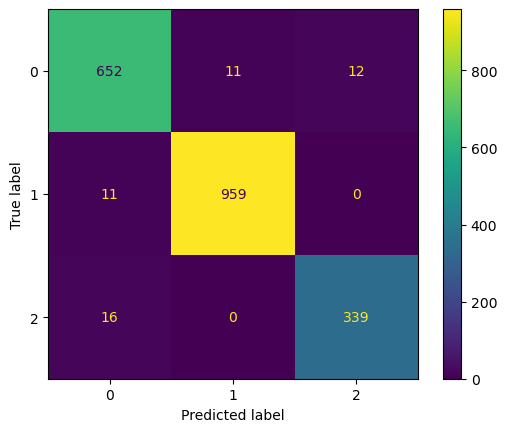

In [26]:
from sklearn import metrics

actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## Menghitung metrik evaluasi

Accuracy: 0.8
Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8
ROC AUC Score: 0.8333333333333333


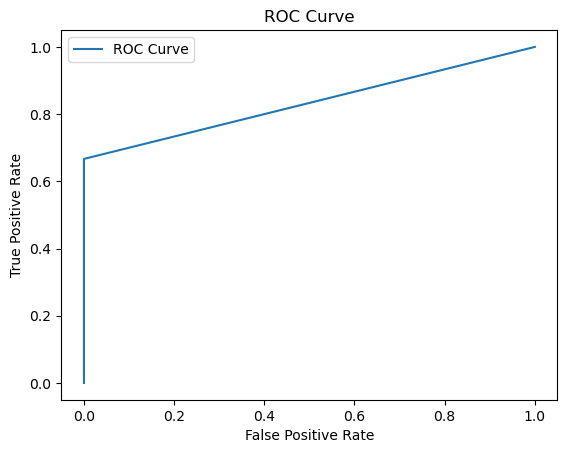

In [28]:
def evaluate_metrics(actual, predicted):
    accuracy = metrics.accuracy_score(actual, predicted)
    precision = metrics.precision_score(actual, predicted)
    recall = metrics.recall_score(actual, predicted)
    f1_score = metrics.f1_score(actual, predicted)
    roc_auc = metrics.roc_auc_score(actual, predicted)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("ROC AUC Score:", roc_auc)
    
    # Plot ROC Curve
    fpr, tpr, thresholds = metrics.roc_curve(actual, predicted)
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()# Contoh penggunaan
actual = [0, 1, 1, 0, 1]
predicted = [0, 1, 1, 0, 0]

# Contoh penggunaan
actual = [0, 1, 1, 0, 1]
predicted = [0, 1, 1, 0, 0]

evaluate_metrics(actual, predicted)